In [1]:
from conditional_inference.conventional import ConventionalModel
from conditional_inference.bayes.empirical_bayes import JamesStein
from conditional_inference.bayes.hierarchical_bayes import LinearHierarchicalBayes
from conditional_inference.quantile_unbiased.rqu import RQU

import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import loguniform

data_path = "../data"
data_files = {
    "Penn Medicine": {
        "filename": "penn_medicine_reconstructed.csv",
        "xlim": (.4, .5),
        "HB_prior": loguniform(1e-7, 1e-5),
    },
    "Walmart": {
        "filename": "walmart_reconstructed.csv",
        "xlim": (.23, .26),
        "HB_prior": loguniform(1e-6, 1e-4),
    }
}
data_filenames = ["penn_medicine_reconstructed.csv", "walmart_reconstructed.csv"]

models = (ConventionalModel, JamesStein, LinearHierarchicalBayes)
models = (JamesStein, LinearHierarchicalBayes)

sns.set()

In [2]:
def analyze_flu(key):
    print("Analyzing", key)
    df = pd.read_csv(os.path.join(data_path, data_files[key]["filename"]))
    df = df[df.control == 0]
    ols_results = sm.OLS(df.y, pd.get_dummies(df.arm)).fit().get_robustcov_results()
    X = sm.add_constant((df.groupby("arm").n_days.mean().values > 1).astype(int))
    xlim = data_files[key]["xlim"]

    apply_model(ols_results, ConventionalModel, xlim)
    apply_model(ols_results, JamesStein, xlim)
    apply_model(ols_results, LinearHierarchicalBayes, xlim, prior_cov_params_distribution=data_files[key]["HB_prior"])
    apply_model(ols_results, JamesStein, xlim, X=X)
    apply_model(ols_results, LinearHierarchicalBayes, xlim, X=X, prior_cov_params_distribution=data_files[key]["HB_prior"])

def apply_model(ols_results, model, xlim=None, **kwargs):
    results = model.from_results(ols_results, **kwargs).fit(cols="sorted")
    ax = results.point_plot()
    ax.set(xlim=xlim)
    print(50*"=")
    plt.show()
    print(f"Probability that the in-sample best arm is best: {results.rank_matrix.values[0, 0]:.2f}")
    print(f"Reconstruction error: {results.score}")
    print("\n\n")

Analyzing Penn Medicine


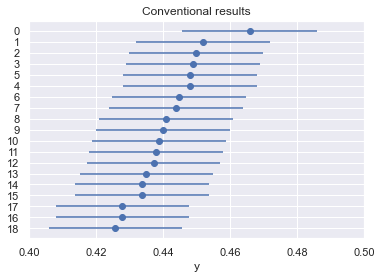

Probability that the in-sample best arm is best: 0.59
Reconstruction error: 8.489475857958031e-05





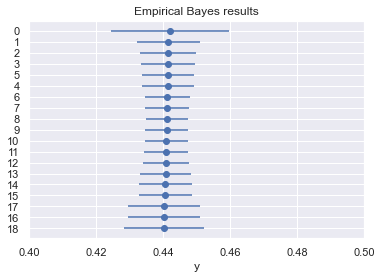

Probability that the in-sample best arm is best: 0.35
Reconstruction error: 2.528788571100492e-05





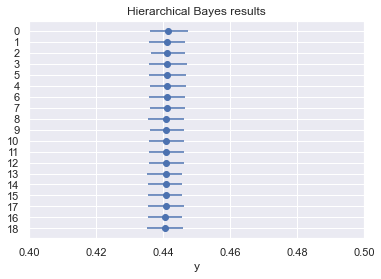

Probability that the in-sample best arm is best: 0.10
Reconstruction error: 2.2740753811331744e-05





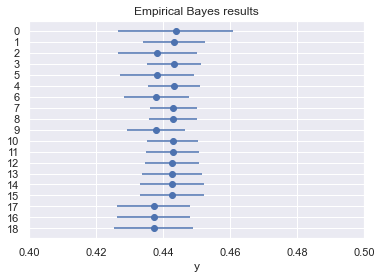

Probability that the in-sample best arm is best: 0.36
Reconstruction error: 2.6655339687454168e-05





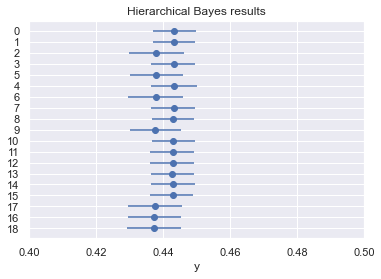

Probability that the in-sample best arm is best: 0.11
Reconstruction error: 2.4609603767729536e-05





In [3]:
analyze_flu("Penn Medicine")

Analyzing Walmart


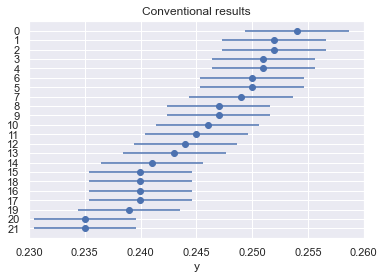

Probability that the in-sample best arm is best: 0.48
Reconstruction error: 3.660291605636448e-06





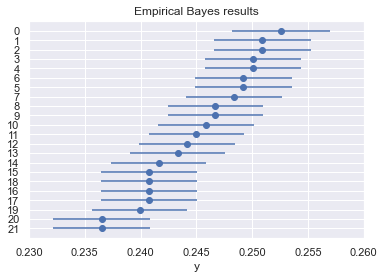

Probability that the in-sample best arm is best: 0.42
Reconstruction error: 2.8393806540086844e-06





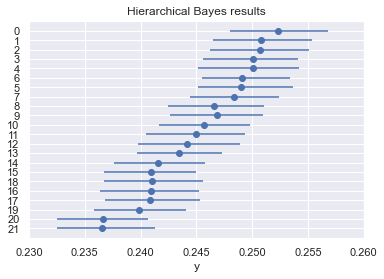

Probability that the in-sample best arm is best: 0.43
Reconstruction error: 2.782402660116313e-06





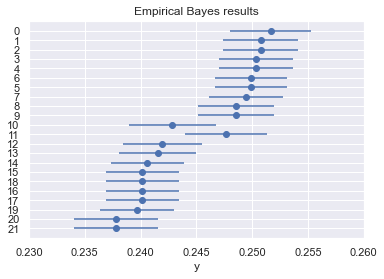

Probability that the in-sample best arm is best: 0.33
Reconstruction error: 2.3146953699814906e-06





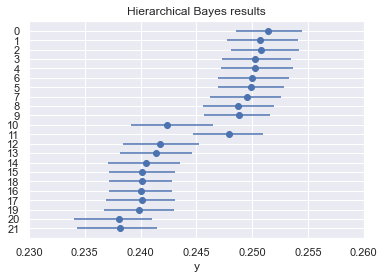

Probability that the in-sample best arm is best: 0.30
Reconstruction error: 2.2947585423281365e-06





In [4]:
analyze_flu("Walmart")

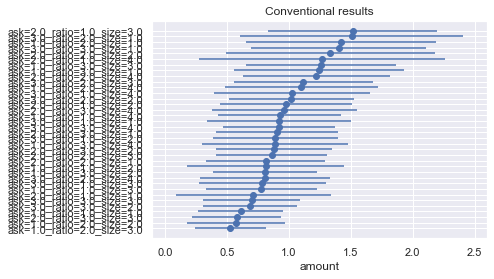

Probability that the in-sample best arm is best: 0.17
Reconstruction error: 0.06293798316982203



c:\users\dbspe\repos\ordered-inference\src\conditional_inference\bayes\empirical_bayes.py:170: RuntimeWarning: The prior variance parameter given by the James-Stein estimator 0.07667168367437639 implies the prior covariance matrix is not positive semi-definite. Increasing the prior variance parameter to 0.2558097839355469.
  warnings.warn(


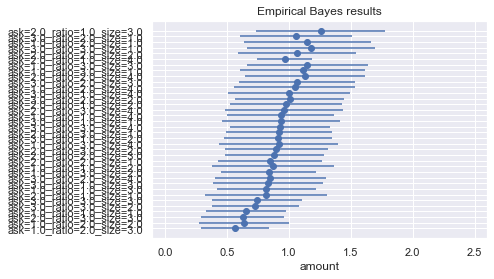

Probability that the in-sample best arm is best: 0.21
Reconstruction error: 0.0327217542710858





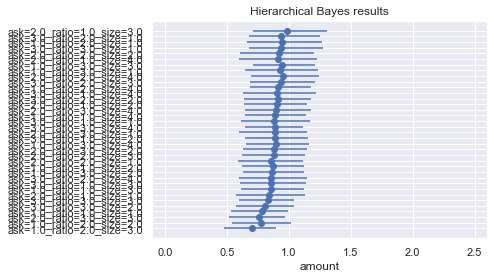

Probability that the in-sample best arm is best: 0.10
Reconstruction error: 0.023366221126913105





In [5]:
df = pd.read_csv(os.path.join(data_path, "charity.csv"))
df = df[df.control == 0]
ols_results = sm.OLS(df.amount, pd.get_dummies(df.arm)).fit().get_robustcov_results()
xlim = (-.1, 2.6)
apply_model(ols_results, ConventionalModel, xlim)
apply_model(ols_results, JamesStein, xlim)
apply_model(ols_results, LinearHierarchicalBayes, xlim, prior_cov_params_distribution=loguniform(1e-2, 1))

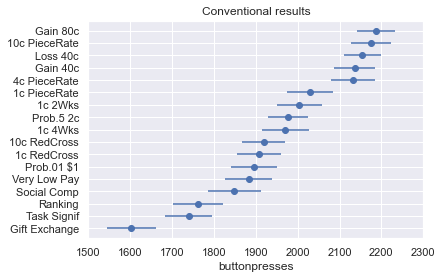

Probability that the in-sample best arm is best: 0.58
Reconstruction error: 814.2428032993646





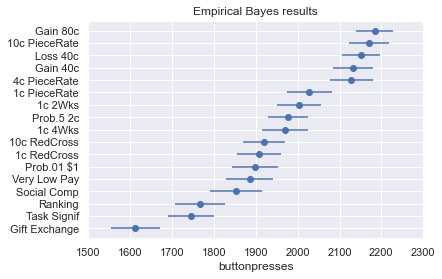

Probability that the in-sample best arm is best: 0.58
Reconstruction error: 808.481915705627





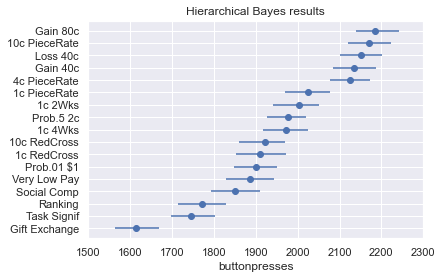

Probability that the in-sample best arm is best: 0.60
Reconstruction error: 781.2147582939136





In [11]:
df = pd.read_csv(os.path.join(data_path, "effort.csv"))
df = df[df.control == 0]
ols_results = sm.OLS(df.buttonpresses, pd.get_dummies(df.arm)).fit().get_robustcov_results()
xlim = (1500, 2300)
apply_model(ols_results, ConventionalModel, xlim)
apply_model(ols_results, JamesStein, xlim)
apply_model(ols_results, LinearHierarchicalBayes, xlim, prior_cov_params_distribution=loguniform(1e4, 1e6))